# Multiple Regression Analysis Notebook

This notebook performs multiple regression analysis on fields in a dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Load the file and clean the data

In [2]:
# Replace 'your_dataset.csv' with the path to your dataset
file_path = 'datasets/student_lifestyle_dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


## Step 2: Specify variables and perform Cross-Validation

In [3]:
# Select features and target (modify column names as needed)
features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']  # Replace with actual feature column names
target = 'GPA'  # Replace with the target variable name

X = data[features]
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso with Cross-Validation to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=10, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha:.5f}")

Best alpha: 0.00168


## Step 3: Run Lasso Regression

In [4]:
# Train final Lasso model with best alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"R-squared (R²): {r2:.5f}")

# Coefficients
coef_df = pd.DataFrame({'Feature': ['Intercept'] + features, 'Coefficient': [lasso.intercept_] + list(lasso.coef_)})
print("\nLasso Coefficients:")
print(coef_df)

Mean Squared Error (MSE): 0.04208
R-squared (R²): 0.54932

Lasso Coefficients:
                           Feature  Coefficient
0                        Intercept     3.115301
1              Study_Hours_Per_Day     0.216880
2    Extracurricular_Hours_Per_Day    -0.010171
3              Sleep_Hours_Per_Day    -0.003462
4             Social_Hours_Per_Day     0.000000
5  Physical_Activity_Hours_Per_Day     0.000000


## Step 4: Plot feature importance

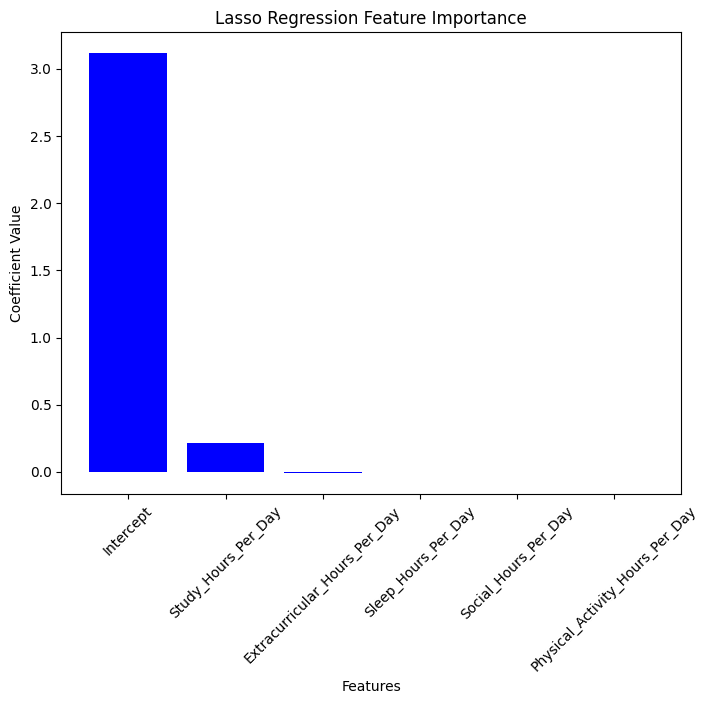

In [5]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression Feature Importance")
plt.xticks(rotation=45)
plt.show()